This notebook performs Figure 3 covariance analyses but downsampling the number of freezing events to match that from baseline (days -2 and days -1, mean) for all other days

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import scipy.io as sio
import pingouin as pg

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import freezing_analysis as fa
from plotting import Fig, pretty_plot, FigMirror
from helpers import contiguous_regions
import covariance_analysis as cova

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


[8.5 6.5]
[8.5 6.5]


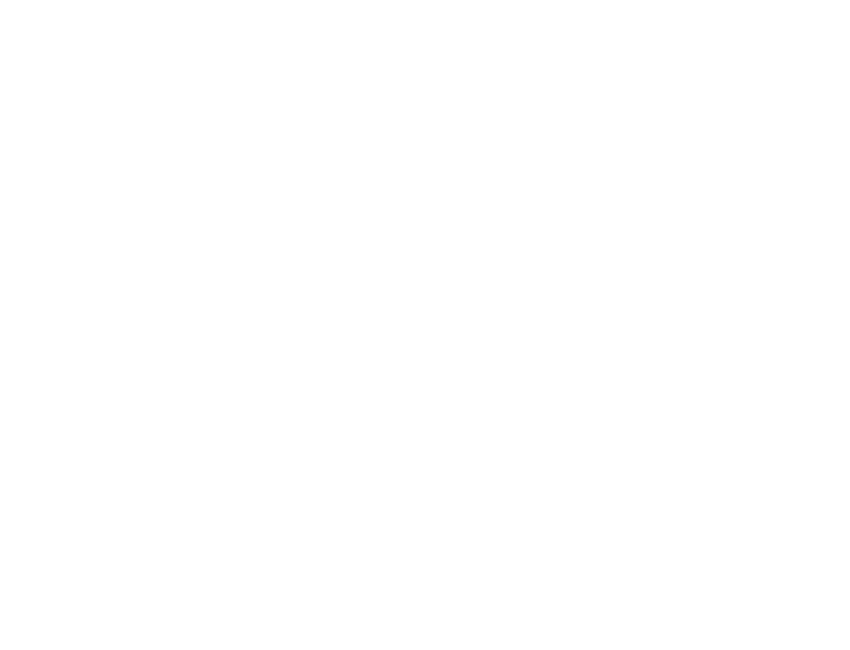

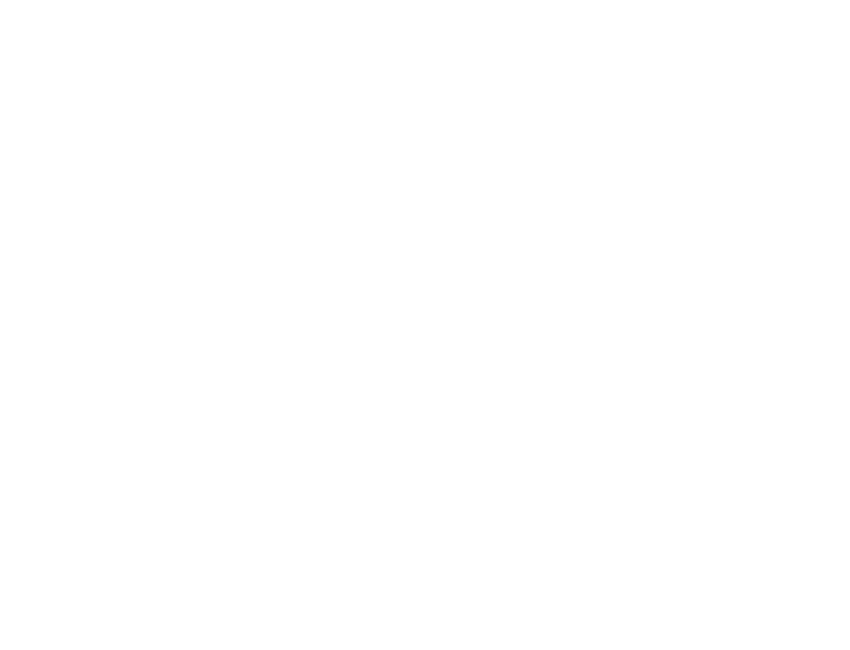

In [2]:
%matplotlib ipympl
Fig3b = Fig(num=3, grid=(4, 4), size=(8.5, 6.5), fontsize=6)  # size=(7.2, 5.3) if not scaling properly
print(Fig3b.fig.get_size_inches())
Fig3bstats = Fig(num="Figure 3b stats", grid=(4, 4), size=(8.5, 6.5), fontsize=6) 
print(Fig3bstats.fig.get_size_inches())
Fig3bcomb = FigMirror(Fig3b, Fig3bstats)

In [3]:
from copy import deepcopy

def add_memory_designations(df_use, before=['-2_-1', '-1_4'], during=['4_1'], after=['1_2', '2_7']):
    """Add in designations for before, 4hr (during), and after ANI administration into your dataframe"""
    df = deepcopy(df_use)
    desig = ["" for a in df.itertuples()]
    
    def create_bool_array_from_list(bool_list):
        bool_out = False
        for b in bool_list:
            bool_out = np.bitwise_or(bool_out, b)
            
        return bool_out
    
    before_bool_list = [df["d1_d2"] == bef for bef in before]
    before_ind = np.where(create_bool_array_from_list(before_bool_list))[0]
    during_bool_list = [df["d1_d2"] == dur for dur in during]
    during_ind = np.where(create_bool_array_from_list(during_bool_list))[0]
    after_bool_list = [df["d1_d2"] == aft for aft in after]
    after_ind = np.where(create_bool_array_from_list(after_bool_list))[0]
    
       # Old hardcoded method below for reference/bug checking
#     before_ind = np.where((df["d1_d2"] == "-2_-1") | (df["d1_d2"] == "-1_4"))[0]
#     during_ind = np.where(df["d1_d2"] == "4_1")[0]
#     after_ind = np.where((df["d1_d2"] == "1_2") | (df["d1_d2"] == "2_7"))[0]
    for idd, d in enumerate(desig):
        if idd in before_ind:
            desig[idd] = "Before"
        elif idd in during_ind:
            desig[idd] = "4hr"
        elif idd in after_ind:
            desig[idd] = "After"

    df['Designation'] = desig
    
    return df

In [5]:
bin_size = 0.5 # sec
all_cov = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                               neurons='all', keep_silent=True)
freeze_silent_cov = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock', 
                                               neurons='freeze_onset', keep_silent=True, base_days=[-2, -1, 4, 1, 2], 
                                               reg_days=[-1, 4, 1, 2, 7], match_event_num=True,
                                               exclude_events='freeze_onset', exclude_buffer=(2, 2))

# Now z-score to baseline days (-2 and -1), add in columns and reorganize a bit
sigz_freeze_df = cova.cov_dict_to_df(freeze_silent_cov, baseline_dict_use=all_cov, include_silent=True)
sigz_freeze_df = add_memory_designations(sigz_freeze_df)

sigz_all_df = cova.cov_dict_to_df(all_cov, baseline_dict_use=all_cov, include_silent=True)
sigz_all_df = add_memory_designations(sigz_all_df)

Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble07: 6it [00:04,  1.33it/s]
Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble12: 6it [00:03,  1.56it/s]
Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble24: 6it [00:03,  1.57it/s]
Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble27: 6it [00:03,  1.54it/s]
Marble06: 4it [00:02,  1.44it/s]

No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 6it [00:05,  1.04it/s]
Marble11: 5it [00:04,  1.09it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble11: 6it [00:05,  1.09it/s]
Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble29: 6it [00:04,  1.47it/s]
Marble17: 5it [00:04,  1.26it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble17: 6it [00:04,  1.26it/s]
Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble18: 6it [00:03,  1.65it/s]
Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble19: 6it [00:04,  1.45it/s]
Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble20: 6it [00:03,  1.63it/s]
Marble25: 5it [00:03,  1.39it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble25: 6it [00:04,  1.41it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.01it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.10it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.13it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.15it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.13it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.07it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:01,  1.02s/it]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.04it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.08it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.10it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.08it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.04it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.06it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.26s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.28s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.26s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.03it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.07s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.05s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.03s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.03s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]


In [6]:
import eraser_reference as err
from copy import copy
def add_in_subject_id(df):
    """Add in mouse ids to dataframe so that you can run mixed anovas. Notebook specific function."""
    df_wid = copy(df)
    mouse_names_use = []
    for names in [err.learners, err.nonlearners, err.ani_mice_good]:
        mouse_names_use.extend(names)
    mouse_id_list = []
    for mid, mname in enumerate(mouse_names_use):
        mouse_id_list.extend([mid]*len(df['d1_d2'].unique()))
    df_wid['Mouse'] = mouse_id_list
    
    return df_wid

In [7]:
# Plot covariance of each set of cells - Broken into ANI vs Ctrls (grouped Learners and Non-Learners)
ax_sigfrz_cov, ax_sigfrz_cov_stats = Fig3bcomb.subplot(Fig3b.gs[0, 0])
ax_sigall_cov, ax_sigall_cov_stats = Fig3bcomb.subplot(Fig3b.gs[0, 1])

sigz_freeze_df = add_in_subject_id(sigz_freeze_df)
sigz_all_df = add_in_subject_id(sigz_all_df)

cmap_use = plt.get_cmap('Set2').colors[0:3:2]  # Use consistent colormap

for a, astat, title_use, df_use in zip([ax_sigfrz_cov, ax_sigall_cov], [ax_sigfrz_cov_stats, ax_sigall_cov_stats],
                                       ['Freeze Cell Covariance (event # matched)', 
                                        'All Cell Covariance (event # matched)'], 
                                       [sigz_freeze_df, sigz_all_df]):
    # Plot data
    gfg = sns.stripplot(x="Designation", y="cov_z_mean", hue="Group", size=3, palette=cmap_use,
                  data=df_use[~(df_use['Designation'] == '')], dodge=True, ax=a)
    gfg.legend(fontsize=6, markerscale=0.15)
    a.set_title(title_use, fontsize=8)
    a.set_ylabel(r'$\mathregular{\overline{Z}}$', fontsize=8)
    a.set_xlabel('', fontsize=8)
    a.tick_params(axis='both', which='major', labelsize=8, grid_linewidth=1)
    plt.setp(a.spines.values(), linewidth=1)
    sns.despine(ax=a)
    
    # Calculate and plot stats
#     stats_before_after(df_use, 'cov_z_mean', ax=astat, fontsize=6)
    stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                         between=['Designation', 'Group'])
    pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                               between=['Group', 'Designation'], parametric=False)
    astat.set_title(title_use)
    astat.text(0.1, 0.7, str(stats_sig), fontdict={'fontsize': 2})
    astat.text(0.1, 0.05, str(pw_sig), fontdict={'fontsize': 2})
    sns.despine(ax=astat, bottom=True, left=True)
    astat.tick_params(axis='both', left=False, bottom=False, labelleft=False, labelbottom=False)
    
    print(stats_sig)
    print(pw_sig)
    

                Source        SS    DF        MS         F     p-unc       np2
0          Designation  0.920065   2.0  0.460033  4.061048  0.022750  0.130744
1                Group  0.216578   1.0  0.216578  1.911891  0.172445  0.034195
2  Designation * Group  0.314832   2.0  0.157416  1.389626  0.257935  0.048948
3             Residual  6.117082  54.0  0.113279       NaN       NaN       NaN
              Contrast Group      A       B Paired  Parametric  U-val  \
0                Group     -    ANI    Ctrl  False       False  322.0   
1          Designation     -    4hr   After  False       False  153.0   
2          Designation     -    4hr  Before  False       False  215.0   
3          Designation     -  After  Before  False       False  445.0   
4  Group * Designation   ANI    4hr   After  False       False   34.0   
5  Group * Designation   ANI    4hr  Before  False       False   39.0   
6  Group * Designation   ANI  After  Before  False       False   74.0   
7  Group * Designatio

Now run the above 100 times to generate a distribution of p-values so that you can calculate the average.

In [8]:
stats_all_cov, stats_freeze_cov = [], []
pw_all_cov, pw_freeze_cov = [], []
niter = 100
for id in range(niter):
    all_cov_ds = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                            neurons='all', keep_silent=True, match_event_num=True,
                                            exclude_events='freeze_onset')
    freeze_silent_cov_ds = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock', 
                                                   neurons='freeze_onset', keep_silent=True, 
                                                   base_days=[-2, -1, 4, 1, 2], 
                                                   reg_days=[-1, 4, 1, 2, 7], match_event_num=True,
                                                   exclude_events='freeze_onset', exclude_buffer=(2, 2))

    # Now z-score to baseline days (-2 and -1), add in columns and reorganize a bit
    sigz_freeze_df_ds = cova.cov_dict_to_df(freeze_silent_cov_ds, baseline_dict_use=all_cov, include_silent=True)
    sigz_freeze_df_ds = add_memory_designations(sigz_freeze_df_ds)

    sigz_all_df_ds = cova.cov_dict_to_df(all_cov_ds, baseline_dict_use=all_cov, include_silent=True)
    sigz_all_df_ds = add_memory_designations(sigz_all_df_ds)

    for df_use, stats_list, pw_list in zip([sigz_freeze_df_ds, sigz_all_df_ds], [stats_freeze_cov, stats_all_cov],
                                           [pw_freeze_cov, pw_all_cov]):
        stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                                 between=['Designation', 'Group'])
        pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                                   between=['Group', 'Designation'], parametric=False)
        stats_list.append(stats_sig)
        pw_list.append(pw_sig)
        
                                         

Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.32it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.33it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.36it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.63it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.62it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.63it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.63it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.60it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.55it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.55it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.56it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.56it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.52it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.52it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.52it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.49it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.49it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.47it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.47it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.66it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.66it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.60it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.59it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.46it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.44it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.45it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.02it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.03it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.02it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.18it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.11it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.38it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.58it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.58it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.58it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.59it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.60it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.56it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.50it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.48it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.48it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.20it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.18it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.22it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.26it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.25it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.60it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.57it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.58it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.57it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.58it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.35it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.39it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.42it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.37it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.36it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.39it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.60it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.60it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.61it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.59it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.59it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.28it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.35it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.41it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.41it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.04s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.00s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.13it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.15it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.15it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.14it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.07it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.10it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.09it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.23s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.04it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.02it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.05it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.18it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.50it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.55it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.48it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.48it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.51it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.65it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.59it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.40it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.26it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.37it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.40it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.40it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.01s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.00s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.00it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.04it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.08s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.18it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.59it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.57it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.54it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.51it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.55it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.49it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.50it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.47it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.48it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.48it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.29s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.04it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:01,  1.00s/it]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.02it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.05it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.06it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.06it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.45it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.44it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.22it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.60it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.60it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.54it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.55it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.55it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.57it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.34it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.43it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.22it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.33it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.41it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.40it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.11it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.00it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.18it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.58it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.27s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.45it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.42it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.43it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.65it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.10it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.11it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.08s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.53it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.54it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.56it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.59it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.51it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.52it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.49it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.52it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.48it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.52it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.48it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.27s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.22it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.24it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.27it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.65it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.03it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.46it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.50it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.52it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.33it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.42it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.13it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.15it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.03it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.07it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.52it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.27it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.60it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.41it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.10it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.11it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:01,  1.04s/it]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.03it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.07it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.05it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.55it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.58it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.56it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.38it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.33it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.41it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.05it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.18it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.17it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.55it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.25it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.25it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.63it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.26s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:02,  1.01s/it]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.03it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.05it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.04it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.36it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.37it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.57it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.57it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.59it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.60it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.42it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.09it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.26s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.24s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.23s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.18it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.19it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.18it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.35it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.57it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.08s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.37it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.55it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.60it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.62it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.24it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.34it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.41it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.14it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.48it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.48it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.10it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.09it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.60it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.61it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.61it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.40it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.63it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.14it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.58it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.57it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.58it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.59it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.56it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.51it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.50it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.61it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.61it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.62it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.59it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.61it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.42it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.39it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.41it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.00it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.00s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.13it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.18it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.02it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.05it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.16it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.17it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.17it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.59it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.56it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.51it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.55it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.50it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:03,  1.02s/it]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.01it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.02it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.03it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.41it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.44it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.38it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.41it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.21it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.24it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.25it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.27it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.26it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.63it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.38it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.43it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.43it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.39it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.42it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.10it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.03s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.10it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.11it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.13it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.12it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.13it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.04it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.03it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.08it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.14it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.17it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.02s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.08it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.06it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.37it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.49it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.57it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.58it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.56it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.49it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.49it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.25it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.26it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.66it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.58it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.63it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.42it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:00,  1.00it/s]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.02it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.02it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.03it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.13s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.02s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.52it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.30it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.25it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.58it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.55it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:02,  1.31it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.41it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.46it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:04,  1.47it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.57it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.58it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.56it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.51it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.50it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.39it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.44it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.46it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.18it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.20it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.02s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.28it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.36it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.36it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.53it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.54it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.52it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.52it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.54it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.51it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.54it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.53it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.48it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:04,  1.50it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.50it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.49it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.51it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.52it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.50it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.51it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.50it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.12it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.19it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.23it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.26it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.24it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.62it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.62it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.62it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.61it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.60it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.61it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.44it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.43it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.61it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.57it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.60it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.40it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.42it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.07s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.04s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.03s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.02s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.15it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.14it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.11it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.04it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.09it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.23s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.07s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:02,  1.00it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.14s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.18it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.18it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.17it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.10s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.03s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.34it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.35it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.37it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.37it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.54it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.49it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.48it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.09it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.30it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.65it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.43it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.66it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.66it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.19s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.02s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.08it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.50it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.58it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.59it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.49it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.50it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.51it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.50it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.45it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.34it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.03it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.06it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.10it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.09it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.06it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.07it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.26s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.03s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.08s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.05it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.18it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.19it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.07s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.03s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:03,  1.01it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.02it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.01it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.58it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.59it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.60it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.56it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.52it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.06it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.06it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.22it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.40it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.42it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.43it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.43it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.61it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.56it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.60it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.59it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.60it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.30it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.36it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.05s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.03s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.02s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.03s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.15it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.15it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.14it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.11it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.00s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.29s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.24s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.20s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.18s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.18s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.10it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.13it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.16it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.17it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.15it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:01,  1.06s/it]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:02,  1.00it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.01it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:04,  1.01s/it]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:05,  1.02s/it]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.02it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.07it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.10it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.09it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.06s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:03,  1.03s/it]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:04,  1.03s/it]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:05,  1.03s/it]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.32it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.34it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.36it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.37it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.36it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.34it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.36it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.48it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.53it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.55it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.54it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.53it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.60it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.55it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.51it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.54it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.50it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.51it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.48it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.47it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.48it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.27s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.06it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.37it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.44it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.21it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.22it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.62it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.61it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.62it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.62it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.61it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.40it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.42it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.45it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.44it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.43it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.61it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.61it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.62it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.60it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.59it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.61it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.00it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.00s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.09it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.17it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.19it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.19it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.05it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.05it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.19it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.18it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.37it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.57it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.50it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.50it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.25it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.27it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.02s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.00s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.00s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.11it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.19it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.19it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.05it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.07it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.51it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.52it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.54it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.58it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.16it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.34it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.40it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.46it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.48it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.44it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.39it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.44it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.47it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.48it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.28s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.59it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.60it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.60it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.42it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.09it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.08s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.12it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.16it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.18it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.31it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.35it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.37it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.37it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.58it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.50it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.50it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.51it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.46it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.22it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.64it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.63it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.61it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.63it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.14it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.09it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.00it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.08s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.58it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.57it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.50it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.55it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.59it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.61it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.61it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.59it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.42it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.01s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.13s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.12s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.08s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.17it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.19it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.19it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.19it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.35it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.56it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.57it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.06it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.39it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.44it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.46it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.40it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.42it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.02it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.14it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.37it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.62it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.60it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.61it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.59it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.49it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.47it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.54it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.61it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.18s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.07it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.08it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.06it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.52it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.35it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.44it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.19it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.12it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.21s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.18s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.19s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.23it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.21it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.08it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.06it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.44it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.49it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.61it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.62it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.65it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.65it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.17it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.19it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.12it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.08it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.06it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.57it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.52it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.47it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.27s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.45it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.66it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.41it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.19it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.14it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.18s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.37it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.62it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.56it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.49it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.46it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.47it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.27s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.41it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.66it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.35it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.39it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.39it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.41it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.53it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.60it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.63it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.44it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.12it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.13it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.14it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.07it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.45it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.64it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.66it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:00,  1.00it/s]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.02it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.18s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.19s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.08it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.48it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.48it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.51it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.49it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.50it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.45it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.49it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.65it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.05s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.44it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.47it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.50it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.51it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.51it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.52it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.46it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:00,  1.00it/s]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.27s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.19s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.08it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.50it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.55it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.43it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.45it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.50it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.44it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.47it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.25it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.60it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.04s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.11it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.19s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.60it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.55it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.50it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.54it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.45it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.50it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.49it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.56it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.60it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.61it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.62it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.44it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.19it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.08it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.40it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.57it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.59it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.59it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.55it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.44it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.46it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.44it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.45it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.02it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.06it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.63it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.52it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.58it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.60it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.47it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.51it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.50it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.49it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.49it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.20it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.47it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.05s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.20it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.56it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.56it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.55it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.55it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.53it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.55it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.41it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.45it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.49it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.46it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.65it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.39it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.14it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.55it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.56it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.56it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.57it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.50it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.49it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.18it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.36it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.36it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.56it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.58it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.52it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.52it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.24it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.00it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.21it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.29it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.31it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.44it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.48it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.49it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.43it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.00s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.00s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.07it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.10it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.06it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.32it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.35it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.37it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.37it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.56it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.59it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.62it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.61it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.62it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.63it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.61it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:00,  1.00it/s]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.09it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.16it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.19it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.19it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.18it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.49it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.49it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.57it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.61it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.46it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.46it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.50it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.21it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.19it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.24it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.65it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.06it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.26s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.09s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.04s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:03,  1.01it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.62it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.60it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.61it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.62it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.46it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.04it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.08it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.18it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.17it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.00it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.01it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.47it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.48it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.66it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.02it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.14it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.21s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.13it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.14it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.16it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.13it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.13it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.49it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.49it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.17it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.44it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.61it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.14it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.15it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.18it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.17it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.45it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.49it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.50it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.19it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.66it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.26it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.35it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.12it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.03it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.05it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.04it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.03it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.08it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.40it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.44it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.12it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.22s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.02it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.03it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.02it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.02it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:01,  1.00s/it]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.10it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.00it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.02it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.54it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.20it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.44it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:00,  1.00it/s]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.19it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.17it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.17it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.02it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.05it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.40it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.44it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.64it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.17it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.17it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.18it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.62it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.56it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.47it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.48it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.45it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.07s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.13it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.16it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.19it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.19it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.18it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.59it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.24it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.41it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.05it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.18s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.19s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.08s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.08s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.09s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.56it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.40it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.46it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.48it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.49it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.65it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.02it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.02it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.14s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.13s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.10s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.07s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.07s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.44it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.04it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.04it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.15s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.62it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.55it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.20it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.00s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.18s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.02it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.04it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.05it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.03it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.06it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.07it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.41it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.65it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.02s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.01it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.04it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.45it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.33it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.46it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.39it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.38it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.41it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.60it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.60it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.59it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.60it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.01it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.02s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:02,  1.00it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.08s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.01s/it]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.01it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:01,  1.01s/it]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.10it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.28s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.28s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.25s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:05,  1.26s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.25s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.54it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.20it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.27s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.25s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.23s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.44it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.66it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.09it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.29s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.50it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.55it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.58it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.59it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.28it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.65it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.61it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.63it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.64it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.06s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.05it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.05it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.27s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.20it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.04it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.06it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.40it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.57it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.61it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.03it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.05it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.06it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.06it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.26s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.27s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.17it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.39it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.44it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.44it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.11it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.20it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.16it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.06it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.04it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.06it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.21s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.08it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.36it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.60it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.65it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.43it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.41it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.66it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.06it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.08it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.08it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.08it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.08it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.05it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.43it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.44it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.41it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:01,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.11it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.04it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.06it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.07it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.07it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.08it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.02it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.21it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.07it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.17it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.47it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.49it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.60it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.64it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.62it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.42it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.05it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.03it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.08it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.09it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.04s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.60it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.65it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.45it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.46it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.44it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.11it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.12it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.12it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.10it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.09it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.26s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.04s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.29it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.33it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.36it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.37it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.52it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.52it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.65it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.44it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.44it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.44it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.15it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.14it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.14it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.09it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.12it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.14it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.14it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.06it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.59it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.54it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.60it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.29it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.64it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.64it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.58it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00it/s]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:02,  1.01it/s]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.02it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.01it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.11it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.12it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.12it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.11it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.12it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.10it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.60it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.55it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.19it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.28it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.27it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.67it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.44it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.02s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.12it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.12it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.12it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.13it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.12it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.17it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.21it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.48it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.30it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.61it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.62it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.32it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.08s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.07s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.06s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.06s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.08it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.13it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.19it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.21it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.58it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.52it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.56it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.57it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.54it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.15it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.20it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:02,  1.08it/s]

17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.15it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.20it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:05,  1.20it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.41it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.11s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.07s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.06s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.04s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.04s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.04it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.06it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.19it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.19it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.38it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.59it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.50it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.53it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.53it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.49it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.22it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.62it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.35it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.40it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.39it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.37it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.39it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.09s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.09s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.04s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.03s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.18it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.17it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.09it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.02it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.06it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.06s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.05it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.06it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.37it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.57it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.59it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.52it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.23s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.09it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.21it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.23it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.63it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.48it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.44it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.63it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.65it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.64it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.61it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.62it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.27it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.33it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.36it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.36it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.34it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.35it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.00s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.00s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:03,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.13it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.09it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.08s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.05s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.05s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.20it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.39it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.57it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.61it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.63it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.63it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.53it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.52it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.52it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.40it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.42it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.66it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.66it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.65it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.42it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.44it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.46it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.62it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.62it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.59it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.56it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.58it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.25it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.32it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:03,  1.36it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.37it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.36it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.00s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.14it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.13it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.10it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.22s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.21it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.22it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.22it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.22it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.21it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.09it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.39it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.61it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.60it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.58it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.58it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.59it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.55it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.58it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.51it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.50it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.47it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.06it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.23it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.24it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.27it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.28it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.29it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.67it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.65it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.60it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.62it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.63it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.46it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.43it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.52it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.55it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.55it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.54it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.54it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.54it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.27it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.35it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.01s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:04,  1.00it/s]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.17it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.18it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.17it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.12it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.08it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.09it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.08it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.13it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.07it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.20it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.37it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.38it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.40it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.39it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.39it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.54it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.57it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.54it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.55it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.54it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.51it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.51it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.05it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.44it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.48it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.16it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.26it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.27it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.29it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.28it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.65it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.65it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.64it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.64it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.21it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.30it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.31it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:03,  1.33it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.32it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.32it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.50it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.52it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.55it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.55it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.51it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.54it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.27it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.34it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.39it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.40it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.38it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.39it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.13s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.07s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.04s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.03s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.04s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.10it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.12it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.14it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.14it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.13it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.13it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.27s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.30s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.28s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.23s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.00s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.04it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.03it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.11s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.12s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.11s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.10s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.20it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.20it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.20it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.03it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.08it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.03it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.13it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.11it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.12it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.09it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.09it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.07s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.36it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.36it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.36it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.57it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.56it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.59it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.56it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.57it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.59it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.61it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.56it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.50it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.49it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.48it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.51it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.51it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.51it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.36it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.41it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.45it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.47it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.09it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.09it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.21it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.22it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.25it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.27it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.26it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.58it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.58it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.59it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.57it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.59it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.39it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.42it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.43it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.42it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.39it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.41it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.61it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.61it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.61it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.59it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.56it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.59it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.28it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.35it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.40it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.41it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.38it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.39it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.05s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.05s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.03s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.02s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.03s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.13it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.13it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.14it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.14it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.14it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.14it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.13it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.08it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.04it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.06it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.00it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.09s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.08s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.08s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.19it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.18it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:01,  1.05s/it]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:02,  1.02s/it]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:03,  1.01it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:04,  1.00it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:05,  1.01s/it]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.10it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.15it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.16it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.15it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.33it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.34it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.35it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.35it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.36it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.58it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.54it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.51it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.52it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.50it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.52it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.57it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.57it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.57it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.53it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.50it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.53it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.49it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.49it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.50it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.51it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.51it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.51it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.51it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.47it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.47it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.47it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.25s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.07it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.07it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.06it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.44it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.44it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.42it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.20it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.24it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.26it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:03,  1.26it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.26it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.63it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.58it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.59it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.58it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.59it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.38it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.42it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.44it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.42it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.39it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.42it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.57it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.59it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.61it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.59it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.56it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.58it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.26it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.34it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.37it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.38it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.38it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.37it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.02s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.02s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.13it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.13it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.13it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.13it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.13it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.06it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.08it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.10it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.09it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.06it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.02s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.02it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.09s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.08s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.08s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.09it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.11it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.12it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.11it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.11it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:01,  1.04s/it]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.01it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.05it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.03it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.16it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.03it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.34it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.35it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.57it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.56it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.51it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.51it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.51it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.52it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.55it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.56it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.56it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.53it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.50it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.53it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.48it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.47it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.50it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.50it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.50it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.49it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.45it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.45it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.45it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.05it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.06it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.36it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.40it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.42it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.42it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.42it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.21it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.24it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.26it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.25it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.62it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.60it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.56it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.57it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.56it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.58it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.39it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.43it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.41it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.38it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.41it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.57it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.58it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.59it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.56it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.55it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.57it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.29it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.30it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.37it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.39it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.39it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.38it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.05s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.02s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.02s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.13it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.14it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.14it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.13it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.13it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.08it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.07s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:02,  1.00s/it]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.04it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.05it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.02it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.21s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.16s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.13s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.14s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.14s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.17it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.17it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.17it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.17it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.02it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.05it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.07it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.18it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.17it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.04it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.33it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.33it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.35it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:03,  1.32it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.33it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.34it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.56it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.55it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.56it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.55it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.54it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.55it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.58it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.57it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.57it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.53it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.50it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.53it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.49it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.49it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.50it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.50it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.49it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.50it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.47it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.45it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.46it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:01,  1.02s/it]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.01it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.05it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.05it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.41it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.43it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.43it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.20it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.21it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.23it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.25it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.63it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.59it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.60it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.57it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.59it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.37it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.43it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.42it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.35it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.39it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.58it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.59it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.59it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.56it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.54it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.57it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.28it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.34it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.40it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.41it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.40it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.40it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.00s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.02s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.15it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.14it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.14it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.13it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.13it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.12it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.08it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.09it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.07it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.07s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:02,  1.05s/it]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:03,  1.00s/it]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:04,  1.00it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:05,  1.01s/it]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.06s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.06s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.18it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.05it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.16it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.18it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.17it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.27it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.31it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.35it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.57it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.56it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.57it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.56it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.53it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.55it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.57it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.56it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.56it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.52it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.49it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.52it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.49it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.48it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.51it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.49it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.50it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.49it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.45it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.46it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.46it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.07it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.06it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.36it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.44it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.19it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.20it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.23it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.25it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.62it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.58it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.59it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.57it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.58it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.38it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.40it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.43it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.41it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.36it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.39it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.59it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.58it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.58it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.56it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.55it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.56it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.29it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.34it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.39it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.41it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.38it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.39it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.02s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.02s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.13it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.14it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.13it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.13it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.10it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.10it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.10it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.07it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.32s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.34s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.30s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:05,  1.32s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.32s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.10s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.08s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.08s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.17it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.17it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.16it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.15it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.15it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.14it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.33it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.35it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.36it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.35it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.56it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.53it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.54it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.53it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.51it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.53it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.54it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.56it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.57it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.50it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.47it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.51it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.49it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.49it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.50it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.49it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.50it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.47it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.44it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.45it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.44it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.02it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.05it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.05it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.35it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.39it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.44it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.45it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.43it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.44it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.15it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.18it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.22it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.23it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.24it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.64it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.61it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.59it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.57it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.59it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.37it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.40it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.38it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.39it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.36it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.38it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.60it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.57it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.58it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.56it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.54it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.56it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.27it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.34it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.39it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.40it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.38it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.39it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.04s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.04s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.03s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.03s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.13it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.13it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.14it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.13it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.13it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.11it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.10it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.09it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.01it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.02it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.02it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.00it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.35s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.30s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.26s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.23s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.02s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:02,  1.02s/it]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.02it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.04it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.03it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.07s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.07s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.18it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.02it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.18it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.16it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.04s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.02it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.03it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.01it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.33it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.55it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.53it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.54it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.54it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.51it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.53it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.56it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.55it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.57it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.54it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.49it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.52it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.46it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.46it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.48it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.49it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.48it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.48it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.47it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.44it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.44it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.45it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:01,  1.01s/it]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.02it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.05it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.05it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.36it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.44it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.44it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.43it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.20it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.16it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.21it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.23it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.24it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.23it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.62it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.58it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.57it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.58it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.57it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.58it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.36it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.39it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.43it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.42it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.38it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.40it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.59it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.59it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.59it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.57it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.54it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.56it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.29it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.29it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.36it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.38it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.37it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.37it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.04s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.04s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.03s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.02s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.13it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.12it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.13it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.13it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.12it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.15it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.02it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.02it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.01it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.02it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.02it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.02it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.04it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.05it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.26s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.11s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.09s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.08s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.08s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.17it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:01,  1.00s/it]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.03it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.17it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.05s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.32it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.33it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.33it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.34it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.44it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.48it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.53it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.52it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.50it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.51it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.52it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.55it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.56it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.52it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.50it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.52it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.47it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.47it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.49it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.49it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.49it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.49it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.46it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.46it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.46it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.27s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.05it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.05it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.40it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.42it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.43it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.43it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.14it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.18it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.22it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.24it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.62it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.59it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.60it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.59it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.57it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.58it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.36it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.40it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.42it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.39it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.37it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.40it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.60it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.59it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.59it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.56it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.55it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.56it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.24it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.27it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.31it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:03,  1.32it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.30it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.32it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.09s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.05s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.03s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.02s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.03s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.12it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.13it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.14it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.11it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.10it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.06it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.05it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.07it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.05it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.04it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.08it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.09it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.09it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.06it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.06it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.07it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.03it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.04it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.03it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.07s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.07s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.07s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.19it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.18it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.18it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.16it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.15it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.07s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.05it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.32it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.33it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.58it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.57it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.57it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.55it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.53it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.54it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.57it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.58it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.58it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.50it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.46it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.51it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.46it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.46it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.47it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.48it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.48it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.49it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.49it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.47it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.46it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.47it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.01it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.06it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.37it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.39it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.43it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.43it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.19it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.16it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.21it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.23it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.23it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.64it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.60it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.57it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.56it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.56it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.58it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.37it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.41it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.39it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.37it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.39it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.57it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.57it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.57it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.55it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.53it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.55it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.26it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.34it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.39it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.38it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.37it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.38it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.04s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.04s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.08s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.09s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.09s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.06it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.04it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.05it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.06it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.06it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.14it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.07it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.08it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.10it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.09it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.08it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.27s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.12s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.08s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.07s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.07s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.17it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.17it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.15it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.16it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:03,  1.01it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.02it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.01it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.32it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.33it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:03,  1.33it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.33it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.34it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.55it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.54it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.55it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.53it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.51it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.52it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.55it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.57it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.56it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.53it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.49it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.52it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.47it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.46it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.49it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.48it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.49it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.46it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.40it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.43it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.45it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.05it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.05it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.35it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.39it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.42it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.44it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.44it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.18it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.20it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.23it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.24it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.64it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.61it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.55it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.55it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.55it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.57it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.39it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.42it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.42it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.38it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.41it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.59it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.54it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.56it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.55it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.52it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.55it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.20it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.26it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.31it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:03,  1.30it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.29it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.30it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.13s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.13s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.09s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.05s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.07s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.12it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.12it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.13it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.13it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.12it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.12it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.13it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.13it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.07it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.08it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.06it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.08it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.08it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.07it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.08it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.24s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.23s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.23s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.02it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.05it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.06it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.11s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.09s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.08s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.07s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.07s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.12it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.15it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.16it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.17it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.16it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.18it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.17it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.07s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.03s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.02it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.31it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.35it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.56it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.48it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.51it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.51it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.51it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.52it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.53it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.55it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.55it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.52it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.48it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.51it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.47it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.46it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.47it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.48it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.47it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.48it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.46it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.46it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.45it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.46it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.03it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.05it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.33it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.39it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.44it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.44it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.11it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.17it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.22it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.24it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.25it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.24it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.57it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.58it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.58it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.57it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.56it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.57it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.37it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.42it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.41it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.34it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.37it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.47it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.47it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:02,  1.48it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.46it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.44it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:04,  1.46it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.14it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.23it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.32it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:03,  1.35it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.35it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.34it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.08s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.05s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.04s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.02s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.03s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.11it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.12it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.12it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.12it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.12it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.14it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.16it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.08it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.08it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.10it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.09it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.07it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.07it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.25s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.24s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.21s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.21s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.22s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.01s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.02it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.03it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.04it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.03it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.12s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.08s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.07s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.07s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.18it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.17it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.17it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.16it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.16it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.03it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.05it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.15it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.16it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.07s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.02it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.03it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.02it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.33it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.33it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.35it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.36it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.35it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.54it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.53it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.53it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.54it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.51it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.52it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.55it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.56it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.56it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.48it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.46it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:04,  1.50it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.49it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.47it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:02,  1.49it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.51it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.48it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:04,  1.49it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.46it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.46it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.46it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.45it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.05it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.03it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.06it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.06it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.05it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.06it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.36it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.39it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.43it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.43it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.42it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.20it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.17it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.21it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.22it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.23it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.23it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.62it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.57it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.56it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.53it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.50it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.52it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.22it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.28it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.33it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:03,  1.32it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.29it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.31it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.56it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.57it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.57it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.55it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.53it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.55it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.28it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.33it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.39it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.39it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.35it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.37it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.03s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.05s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.03s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.03s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.13it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.12it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.13it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.13it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.12it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.13it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.13it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.15it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.12it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.11it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.09it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.07it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.07it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.07it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.25s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.26s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.25s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.22s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.22s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.23s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.02s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.03it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.05it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.13s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.10s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.09s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.08s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.08s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.17it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.18it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.18it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.18it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.17it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.01it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.15it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.15it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.17it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.16it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.16it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.02s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:03,  1.01it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.03it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.01it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.34it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.35it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.35it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.40it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.45it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:02,  1.50it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.53it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.54it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.52it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.60it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.56it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.52it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.55it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.53it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.52it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.52it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.51it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.52it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.44it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.47it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.47it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:05,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.07it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.39it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.47it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.47it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.18it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.20it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.17it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.17it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:05,  1.18it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.52it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.50it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:02,  1.46it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.47it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.52it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.52it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.36it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.41it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.44it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.44it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.43it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.60it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.62it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.62it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.61it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.60it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.31it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.37it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.45it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.43it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.43it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.02s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.00s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.01s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.16it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.16it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.15it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.18it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.14it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.11it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.10it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.11it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.23s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.20s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.20s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:06,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.07it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.07it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.15it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.19it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.19it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.20it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.19it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.04it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.09it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.08it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.07it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.21it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.20it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.03s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.05it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.07it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.05it/s]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.36it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.36it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.37it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.38it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.37it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [00:04,  1.38it/s]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.53it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.57it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.58it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.57it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.58it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.61it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.51it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.51it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.53it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.54it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.53it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.54it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.49it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.24s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.08it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.08it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.43it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.42it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.43it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.06it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.11it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.16it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.17it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.18it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:05,  1.17it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.64it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.60it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.62it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.63it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.61it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.62it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.43it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.46it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.63it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.63it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.60it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.63it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.30it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.36it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.39it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.41it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [00:03,  1.41it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [00:04,  1.42it/s]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.06s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.03s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [00:05,  1.01s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.15it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.16it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.15it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.17it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.19it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.16it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.10it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.12it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.14it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.13it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.10it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.10it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.22s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.23s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.19s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [00:05,  1.20s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.06it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.09s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.06s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.07s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.10s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.19it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.17it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.17it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.17it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [00:04,  1.15it/s]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.02it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.06it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.05it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.16it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.17it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.19it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.17it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [00:04,  1.17it/s]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.01s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.03it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.04it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:05,  1.06s/it]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.33it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.34it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.36it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.33it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [00:03,  1.34it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [03:27, 34.66s/it]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.55it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.59it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.61it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.48it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.47it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.52it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.33it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.44it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:02,  1.52it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.42it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.42it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:04,  1.45it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.54it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [00:02,  1.56it/s]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [00:03,  1.55it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [00:03,  1.55it/s]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.54it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.49it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.50it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:04,  1.26s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:05,  1.06it/s]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.02it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.04it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.08it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.01it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.02it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [00:05,  1.04it/s]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.35it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.41it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.45it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.47it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.46it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.46it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.21it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [00:01,  1.15it/s]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [00:02,  1.22it/s]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [00:03,  1.25it/s]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [00:04,  1.27it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [00:04,  1.26it/s]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.69it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.68it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.66it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [00:03,  1.65it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [00:03,  1.66it/s]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.31it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.39it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.44it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.44it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [15:35, 155.85s/it]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [00:00,  1.62it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [00:01,  1.64it/s]

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [00:01,  1.66it/s]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [00:02,  1.65it/s]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [00:03,  1.63it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [00:03,  1.64it/s]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.39it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [17:32, 480.37s/it]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [17:33, 290.99s/it]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [17:33, 186.32s/it]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [17:34, 175.77s/it]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.02s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.01s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.01s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [12:49, 303.18s/it]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [12:50, 154.09s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.17it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.18it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.08it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.08it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.10it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.13it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [00:01,  1.12it/s]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [00:02,  1.16it/s]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [00:03,  1.15it/s]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [00:04,  1.13it/s]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.02it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.07it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.09it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [00:03,  1.11it/s]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [00:04,  1.10it/s]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.09it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [16:02, 565.79s/it]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [16:02, 307.83s/it]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [16:03, 186.68s/it]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [16:06, 193.31s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [15:16, 539.10s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [15:18, 293.53s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [15:19, 178.11s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [15:20, 184.11s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.12s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [17:54, 631.78s/it]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [17:55, 343.71s/it]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [17:56, 208.37s/it]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [17:57, 215.42s/it]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [17:56, 491.14s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [17:57, 297.66s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [17:58, 215.71s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.22it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [00:01,  1.21it/s]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [00:02,  1.23it/s]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [00:03,  1.23it/s]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [15:08, 181.69s/it]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:00,  1.02it/s]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.06it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.02it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.04it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.04it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [17:41, 1061.11s/it]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [17:41, 437.41s/it] 

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [17:42, 238.05s/it]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [17:43, 144.41s/it]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [17:44, 212.89s/it]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.02it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [17:31, 479.66s/it]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [17:32, 290.68s/it]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [17:33, 210.64s/it]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.34it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.35it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.23it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [15:43, 372.00s/it]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [15:44, 238.11s/it]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [15:44, 157.47s/it]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.60it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.61it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:01,  1.62it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.61it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.59it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.60it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [00:01,  1.62it/s]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [00:01,  1.62it/s]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1


Marble24: 4it [00:02,  1.58it/s]

21 events out of 45 excluded for day 2
21 events out of 45 excluded for day 2


Marble24: 5it [00:03,  1.53it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [00:03,  1.57it/s]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.50it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.53it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.56it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [15:25, 365.16s/it]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [15:26, 233.72s/it]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [15:27, 154.54s/it]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.44it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.39it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:02,  1.44it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.45it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:40, 14.02s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [00:41,  6.85s/it]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:01,  1.02s/it]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:02,  1.01s/it]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.02it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.05it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.06it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [15:40, 156.75s/it]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.38it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.42it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.47it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.48it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.48it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.24it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [17:53, 631.56s/it]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [17:54, 343.53s/it]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [17:55, 208.21s/it]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [17:56, 133.40s/it]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [17:56, 179.49s/it]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.68it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.67it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.59it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.62it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [16:00, 345.82s/it]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [16:00, 160.16s/it]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.41it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.45it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.47it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.47it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.43it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [17:06, 1026.03s/it]

0 events out of 21 excluded for day -1


Marble20: 2it [17:06, 422.86s/it] 

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [17:07, 230.05s/it]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [17:07, 139.47s/it]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [17:08, 89.41s/it] 

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [17:09, 171.52s/it]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.28it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.35it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.43it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [17:18, 374.08s/it]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [17:19, 173.27s/it]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.04s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.04s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.00it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [17:46, 213.25s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.12it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.15it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.17it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.18it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:00,  1.16it/s]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [16:58, 598.67s/it]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [16:58, 325.71s/it]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [16:59, 197.48s/it]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [17:00, 204.14s/it]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.09it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.01it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [00:02,  1.03it/s]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [15:32, 367.42s/it]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [15:32, 186.60s/it]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.08it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.09it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.10it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [07:15, 87.01s/it] 
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.23s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.19s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [00:04,  1.18s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [17:40, 212.07s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:01,  1.14s/it]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:02,  1.02s/it]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.04it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.07it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [00:04,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [17:38, 1058.40s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [17:39, 436.47s/it] 

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [17:40, 237.63s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [17:41, 144.22s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [17:42, 212.52s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [00:00,  1.16it/s]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [08:45, 308.96s/it]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [08:46, 168.26s/it]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [08:47, 102.16s/it]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [08:47, 105.60s/it]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:01,  1.01s/it]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.05it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [00:02,  1.07it/s]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [00:03,  1.06it/s]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [00:04,  1.05it/s]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.19it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [15:35, 549.99s/it]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [15:36, 299.22s/it]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [15:36, 181.42s/it]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [15:37, 187.54s/it]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.04s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:01,  1.01it/s]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [13:24, 316.95s/it]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [13:25, 161.08s/it]
Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble07: 1it [00:00,  1.35it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble07: 2it [00:01,  1.32it/s]

21 events out of 43 excluded for day 4
21 events out of 43 excluded for day 4


Marble07: 3it [00:02,  1.34it/s]

28 events out of 50 excluded for day 1
28 events out of 50 excluded for day 1


Marble07: 4it [00:02,  1.34it/s]

33 events out of 55 excluded for day 2
33 events out of 55 excluded for day 2


Marble07: 5it [15:58, 345.08s/it]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7
21 events out of 43 excluded for day 4


Marble07: 6it [15:59, 159.90s/it]

33 events out of 55 excluded for day 2



Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble12: 1it [00:00,  1.55it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble12: 2it [00:01,  1.39it/s]

25 events out of 47 excluded for day 4
25 events out of 47 excluded for day 4


Marble12: 3it [00:02,  1.49it/s]

32 events out of 54 excluded for day 1
32 events out of 54 excluded for day 1


Marble12: 4it [00:02,  1.53it/s]

4 events out of 26 excluded for day 2
4 events out of 26 excluded for day 2


Marble12: 5it [00:03,  1.55it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7
25 events out of 47 excluded for day 4


Marble12: 6it [00:03,  1.54it/s]

4 events out of 26 excluded for day 2



Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble24: 1it [00:00,  1.60it/s]

0 events out of 26 excluded for day -1
0 events out of 26 excluded for day -1


Marble24: 2it [15:34, 549.68s/it]

11 events out of 35 excluded for day 4
11 events out of 35 excluded for day 4


Marble24: 3it [15:35, 299.04s/it]

23 events out of 47 excluded for day 1
23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [15:36, 181.34s/it]

21 events out of 45 excluded for day 2


Marble24: 5it [15:37, 116.20s/it]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7
11 events out of 35 excluded for day 4


Marble24: 6it [15:37, 156.27s/it]

21 events out of 45 excluded for day 2



Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2


Marble27: 1it [00:00,  1.52it/s]

0 events out of 17 excluded for day -1
0 events out of 17 excluded for day -1


Marble27: 2it [00:01,  1.52it/s]

30 events out of 45 excluded for day 4
30 events out of 45 excluded for day 4


Marble27: 3it [00:01,  1.55it/s]

35 events out of 50 excluded for day 1
35 events out of 50 excluded for day 1


Marble27: 4it [15:36, 369.53s/it]

28 events out of 43 excluded for day 2
28 events out of 43 excluded for day 2


Marble27: 5it [15:37, 236.54s/it]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7
30 events out of 45 excluded for day 4


Marble27: 6it [15:38, 156.39s/it]

28 events out of 43 excluded for day 2



Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2


Marble06: 1it [00:00,  1.52it/s]

0 events out of 22 excluded for day -1
0 events out of 22 excluded for day -1


Marble06: 2it [00:01,  1.50it/s]

6 events out of 36 excluded for day 4
6 events out of 36 excluded for day 4


Marble06: 3it [00:01,  1.51it/s]

7 events out of 37 excluded for day 1
7 events out of 37 excluded for day 1


Marble06: 4it [00:02,  1.50it/s]

0 events out of 22 excluded for day 2
0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [17:03, 368.51s/it]

6 events out of 36 excluded for day 4


Marble06: 6it [17:04, 170.70s/it]

0 events out of 22 excluded for day 2



Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2


Marble11: 1it [00:00,  1.04it/s]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble11: 2it [00:01,  1.05it/s]

10 events out of 28 excluded for day 4
10 events out of 28 excluded for day 4


Marble11: 3it [00:02,  1.09it/s]

0 events out of 15 excluded for day 1
0 events out of 15 excluded for day 1


Marble11: 4it [00:03,  1.08it/s]

0 events out of 17 excluded for day 2
0 events out of 17 excluded for day 2


Marble11: 5it [00:04,  1.08it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7
10 events out of 28 excluded for day 4


Marble11: 6it [15:52, 158.80s/it]

0 events out of 17 excluded for day 2



Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2


Marble29: 1it [00:00,  1.33it/s]

0 events out of 27 excluded for day -1
0 events out of 27 excluded for day -1


Marble29: 2it [00:01,  1.41it/s]

17 events out of 42 excluded for day 4
17 events out of 42 excluded for day 4


Marble29: 3it [00:02,  1.46it/s]

33 events out of 58 excluded for day 1
33 events out of 58 excluded for day 1


Marble29: 4it [00:02,  1.49it/s]

29 events out of 54 excluded for day 2
29 events out of 54 excluded for day 2


Marble29: 5it [00:03,  1.49it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7
17 events out of 42 excluded for day 4


Marble29: 6it [00:04,  1.48it/s]

29 events out of 54 excluded for day 2



Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2


Marble17: 1it [00:00,  1.15it/s]

0 events out of 5 excluded for day -1
0 events out of 5 excluded for day -1


Marble17: 2it [17:05, 603.35s/it]

24 events out of 35 excluded for day 4
24 events out of 35 excluded for day 4


Marble17: 3it [17:06, 328.19s/it]

17 events out of 28 excluded for day 1
17 events out of 28 excluded for day 1


Marble17: 4it [17:07, 198.93s/it]

6 events out of 17 excluded for day 2
6 events out of 17 excluded for day 2


Marble17: 5it [17:08, 127.47s/it]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7
24 events out of 35 excluded for day 4


Marble17: 6it [17:08, 171.50s/it]

6 events out of 17 excluded for day 2



Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble18: 1it [00:00,  1.66it/s]

0 events out of 13 excluded for day -1
0 events out of 13 excluded for day -1


Marble18: 2it [00:01,  1.45it/s]

37 events out of 49 excluded for day 4
37 events out of 49 excluded for day 4


Marble18: 3it [00:01,  1.55it/s]

6 events out of 18 excluded for day 1
6 events out of 18 excluded for day 1


Marble18: 4it [00:02,  1.59it/s]

0 events out of 12 excluded for day 2
0 events out of 12 excluded for day 2


Marble18: 5it [15:26, 333.56s/it]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7
37 events out of 49 excluded for day 4


Marble18: 6it [15:27, 154.51s/it]

0 events out of 12 excluded for day 2



Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2


Marble19: 1it [00:00,  1.44it/s]

0 events out of 31 excluded for day -1
0 events out of 31 excluded for day -1


Marble19: 2it [00:01,  1.48it/s]

9 events out of 35 excluded for day 4
9 events out of 35 excluded for day 4


Marble19: 3it [00:02,  1.44it/s]

1 events out of 27 excluded for day 1
1 events out of 27 excluded for day 1


Marble19: 4it [00:02,  1.45it/s]

0 events out of 25 excluded for day 2
0 events out of 25 excluded for day 2


Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7
9 events out of 35 excluded for day 4


Marble19: 6it [00:04,  1.45it/s]

0 events out of 25 excluded for day 2



Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2


Marble20: 1it [17:27, 1047.98s/it]

0 events out of 21 excluded for day -1
0 events out of 21 excluded for day -1


Marble20: 2it [17:28, 431.87s/it] 

21 events out of 37 excluded for day 4
21 events out of 37 excluded for day 4


Marble20: 3it [17:29, 234.94s/it]

2 events out of 18 excluded for day 1
2 events out of 18 excluded for day 1


Marble20: 4it [17:29, 142.43s/it]

0 events out of 10 excluded for day 2
0 events out of 10 excluded for day 2


Marble20: 5it [17:30, 91.30s/it] 

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7
21 events out of 37 excluded for day 4


Marble20: 6it [17:31, 175.17s/it]

0 events out of 10 excluded for day 2



Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2


Marble25: 1it [00:00,  1.33it/s]

0 events out of 30 excluded for day -1
0 events out of 30 excluded for day -1


Marble25: 2it [00:01,  1.38it/s]

8 events out of 39 excluded for day 4
8 events out of 39 excluded for day 4


Marble25: 3it [00:02,  1.44it/s]

0 events out of 23 excluded for day 1
0 events out of 23 excluded for day 1


Marble25: 4it [00:02,  1.44it/s]

5 events out of 36 excluded for day 2
5 events out of 36 excluded for day 2


Marble25: 5it [15:20, 331.53s/it]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7
8 events out of 39 excluded for day 4


Marble25: 6it [15:21, 153.61s/it]

5 events out of 36 excluded for day 2



Marble07: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 26 excluded for day -1


Marble07: 1it [00:01,  1.04s/it]

0 events out of 26 excluded for day -1
21 events out of 43 excluded for day 4


Marble07: 2it [00:02,  1.02s/it]

21 events out of 43 excluded for day 4
28 events out of 50 excluded for day 1


Marble07: 3it [00:03,  1.00s/it]

28 events out of 50 excluded for day 1
33 events out of 55 excluded for day 2


Marble07: 4it [00:04,  1.01it/s]

33 events out of 55 excluded for day 2
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
17 events out of 39 excluded for day 7


Marble07: 5it [17:52, 214.45s/it]
Marble12: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 30 excluded for day -1


Marble12: 1it [00:00,  1.12it/s]

0 events out of 30 excluded for day -1
25 events out of 47 excluded for day 4


Marble12: 2it [00:01,  1.14it/s]

25 events out of 47 excluded for day 4
32 events out of 54 excluded for day 1


Marble12: 3it [00:02,  1.16it/s]

32 events out of 54 excluded for day 1
4 events out of 26 excluded for day 2


Marble12: 4it [00:03,  1.17it/s]

4 events out of 26 excluded for day 2
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
14 events out of 36 excluded for day 7


Marble12: 5it [00:04,  1.16it/s]
Marble24: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 26 excluded for day -1


Marble24: 1it [00:01,  1.06s/it]

0 events out of 26 excluded for day -1
11 events out of 35 excluded for day 4


Marble24: 2it [16:10, 570.65s/it]

11 events out of 35 excluded for day 4
23 events out of 47 excluded for day 1


Marble24: 3it [16:11, 310.45s/it]

23 events out of 47 excluded for day 1
21 events out of 45 excluded for day 2


Marble24: 4it [16:12, 188.24s/it]

21 events out of 45 excluded for day 2
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
9 events out of 33 excluded for day 7


Marble24: 5it [16:13, 194.61s/it]
Marble27: 0it [00:00, ?it/s]

0 events out of 13 excluded for day -2
0 events out of 17 excluded for day -1


Marble27: 1it [00:00,  1.11it/s]

0 events out of 17 excluded for day -1
30 events out of 45 excluded for day 4


Marble27: 2it [00:01,  1.12it/s]

30 events out of 45 excluded for day 4
35 events out of 50 excluded for day 1


Marble27: 3it [16:14, 444.82s/it]

35 events out of 50 excluded for day 1
28 events out of 43 excluded for day 2


Marble27: 4it [16:15, 269.57s/it]

28 events out of 43 excluded for day 2
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
8 events out of 23 excluded for day 7


Marble27: 5it [16:16, 195.34s/it]
Marble06: 0it [00:00, ?it/s]

0 events out of 38 excluded for day -2
0 events out of 22 excluded for day -1


Marble06: 1it [00:00,  1.11it/s]

0 events out of 22 excluded for day -1
6 events out of 36 excluded for day 4


Marble06: 2it [00:01,  1.11it/s]

6 events out of 36 excluded for day 4
7 events out of 37 excluded for day 1


Marble06: 3it [00:02,  1.11it/s]

7 events out of 37 excluded for day 1
0 events out of 22 excluded for day 2


Marble06: 4it [00:03,  1.11it/s]

0 events out of 22 excluded for day 2
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [15:32, 186.49s/it]
Marble11: 0it [00:00, ?it/s]

0 events out of 15 excluded for day -2
0 events out of 21 excluded for day -1


Marble11: 1it [00:01,  1.24s/it]

0 events out of 21 excluded for day -1
10 events out of 28 excluded for day 4


Marble11: 2it [00:02,  1.21s/it]

10 events out of 28 excluded for day 4
0 events out of 15 excluded for day 1


Marble11: 3it [00:03,  1.24s/it]

0 events out of 15 excluded for day 1
0 events out of 17 excluded for day 2


Marble11: 4it [17:30, 413.90s/it]

0 events out of 17 excluded for day 2
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 20 excluded for day 7


Marble11: 5it [17:31, 210.28s/it]
Marble29: 0it [00:00, ?it/s]

0 events out of 24 excluded for day -2
0 events out of 27 excluded for day -1


Marble29: 1it [00:00,  1.01it/s]

0 events out of 27 excluded for day -1
17 events out of 42 excluded for day 4


Marble29: 2it [00:01,  1.05it/s]

17 events out of 42 excluded for day 4
33 events out of 58 excluded for day 1


Marble29: 3it [00:02,  1.06it/s]

33 events out of 58 excluded for day 1
29 events out of 54 excluded for day 2


Marble29: 4it [00:03,  1.08it/s]

29 events out of 54 excluded for day 2
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 23 excluded for day 7


Marble29: 5it [16:55, 203.19s/it]
Marble17: 0it [00:00, ?it/s]

0 events out of 18 excluded for day -2
0 events out of 5 excluded for day -1


Marble17: 1it [00:01,  1.10s/it]

0 events out of 5 excluded for day -1
24 events out of 35 excluded for day 4


Marble17: 2it [00:02,  1.07s/it]

24 events out of 35 excluded for day 4
17 events out of 28 excluded for day 1


Marble17: 3it [00:03,  1.05s/it]

17 events out of 28 excluded for day 1
6 events out of 17 excluded for day 2


Marble17: 4it [00:04,  1.04s/it]

6 events out of 17 excluded for day 2
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
23 events out of 34 excluded for day 7


Marble17: 5it [00:05,  1.04s/it]
Marble18: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 13 excluded for day -1


Marble18: 1it [14:59, 899.09s/it]

0 events out of 13 excluded for day -1
37 events out of 49 excluded for day 4


Marble18: 2it [14:59, 370.72s/it]

37 events out of 49 excluded for day 4
6 events out of 18 excluded for day 1


Marble18: 3it [15:00, 201.81s/it]

6 events out of 18 excluded for day 1
0 events out of 12 excluded for day 2


Marble18: 4it [15:01, 122.47s/it]

0 events out of 12 excluded for day 2
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
1 events out of 13 excluded for day 7


Marble18: 5it [15:02, 180.49s/it]
Marble19: 0it [00:00, ?it/s]

0 events out of 22 excluded for day -2
0 events out of 31 excluded for day -1


Marble19: 1it [00:01,  1.03s/it]

0 events out of 31 excluded for day -1
9 events out of 35 excluded for day 4


Marble19: 2it [00:01,  1.04it/s]

9 events out of 35 excluded for day 4
1 events out of 27 excluded for day 1


Marble19: 3it [16:53, 462.27s/it]

1 events out of 27 excluded for day 1
0 events out of 25 excluded for day 2


Marble19: 4it [16:54, 280.14s/it]

0 events out of 25 excluded for day 2
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
0 events out of 24 excluded for day 7


Marble19: 5it [16:55, 203.02s/it]
Marble20: 0it [00:00, ?it/s]

0 events out of 11 excluded for day -2
0 events out of 21 excluded for day -1


Marble20: 1it [00:00,  1.18it/s]

0 events out of 21 excluded for day -1
21 events out of 37 excluded for day 4


Marble20: 2it [00:01,  1.20it/s]

21 events out of 37 excluded for day 4
2 events out of 18 excluded for day 1


Marble20: 3it [00:02,  1.22it/s]

2 events out of 18 excluded for day 1
0 events out of 10 excluded for day 2


Marble20: 4it [00:03,  1.21it/s]

0 events out of 10 excluded for day 2
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
19 events out of 35 excluded for day 7


Marble20: 5it [17:02, 204.50s/it]
Marble25: 0it [00:00, ?it/s]

0 events out of 32 excluded for day -2
0 events out of 30 excluded for day -1


Marble25: 1it [00:01,  1.06s/it]

0 events out of 30 excluded for day -1
8 events out of 39 excluded for day 4


Marble25: 2it [00:02,  1.00s/it]

8 events out of 39 excluded for day 4
0 events out of 23 excluded for day 1


Marble25: 3it [00:02,  1.06it/s]

0 events out of 23 excluded for day 1
5 events out of 36 excluded for day 2


Marble25: 4it [00:03,  1.06it/s]

5 events out of 36 excluded for day 2
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
2 events out of 33 excluded for day 7


Marble25: 5it [00:04,  1.04it/s]


In [9]:
def make_avg_pw_df(pw_df_list):
    num_inds = [4, 5, 6, 8, 9, 11]
    avg_df = deepcopy(pw_df_list[0])
    for loc in pd.concat(pw_df_list).index.unique():
        avg_df.iloc[loc, num_inds] = pd.concat(pw_df_list).loc[loc].iloc[:, num_inds].mean(axis=0)
    
    return avg_df

In [10]:
def make_avg_stats_df(stats_df_list):
    num_inds = [1, 2, 3, 4, 5, 6]
    avg_df = deepcopy(stats_df_list[0])
    for loc in pd.concat(stats_df_list).index.unique():
        avg_df.iloc[loc, num_inds] = pd.concat(stats_df_list).loc[loc].iloc[:, num_inds].mean(axis=0)
    
    return avg_df

In [11]:
# Plot covariance of each set of cells - Broken into ANI vs Ctrls (grouped Learners and Non-Learners)
ax_sigfrz_cov_avg, ax_sigfrz_cov_stats_avg = Fig3bcomb.subplot(Fig3b.gs[1, 0])
ax_sigall_cov_avg, ax_sigall_cov_stats_avg = Fig3bcomb.subplot(Fig3b.gs[1, 1])

cmap_use = plt.get_cmap('Set2').colors[0:3:2]  # Use consistent colormap

for astat, title_use, stats_sig_all, pw_sig_all in zip([ax_sigfrz_cov_stats_avg, ax_sigall_cov_stats_avg],
                                       ['Freeze Cell Covariance (event # matched) - Avg Stats', 
                                        'All Cell Covariance (event # matched)  - Avg Stats'], 
                                       [stats_freeze_cov, stats_all_cov], [pw_freeze_cov, pw_all_cov]):
    astat.set_title(title_use)
    astat.text(0.1, 0.7, str(make_avg_stats_df(stats_sig_all)), fontdict={'fontsize': 2})
    astat.text(0.1, 0.05, str(make_avg_pw_df(pw_sig_all)), fontdict={'fontsize': 2})
    sns.despine(ax=astat, bottom=True, left=True)
    astat.tick_params(axis='both', left=False, bottom=False, labelleft=False, labelbottom=False)
    
    print(make_avg_stats_df(stats_sig_all))
    print(make_avg_pw_df(pw_sig_all))
    

                Source        SS    DF        MS         F     p-unc       np2
0          Designation  0.958445   2.0  0.479222  4.146073  0.021349  0.133093
1                Group  0.193843   1.0  0.193843  1.682586  0.204945  0.030189
2  Designation * Group  0.335632   2.0  0.167816  1.447831  0.250130  0.050832
3             Residual  6.240712  54.0  0.115569       NaN       NaN       NaN
              Contrast Group      A       B Paired Parametric   U-val  \
0                Group     -    ANI    Ctrl    0.0        0.0  322.85   
1          Designation     -    4hr   After    0.0        0.0  155.47   
2          Designation     -    4hr  Before    0.0        0.0  214.17   
3          Designation     -  After  Before    0.0        0.0  441.96   
4  Group * Designation   ANI    4hr   After    0.0        0.0   33.87   
5  Group * Designation   ANI    4hr  Before    0.0        0.0   38.96   
6  Group * Designation   ANI  After  Before    0.0        0.0   74.26   
7  Group * Designatio

In [12]:
plot_path = Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots')
Fig3b.savefig(plot_path / 'Figure3_event_matched.pdf', scriptname='Figure3_covariance_event_num_matched.ipynb')
Fig3bstats.savefig(plot_path / 'Figure3_event_matched_stats.pdf', scriptname='Figure3_covariance_event_num_matched.ipynb')

/Users/nkinsky/Documents/BU/GitHub/Eraser/plotting.py:259: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig(filename, dpi=dpi, backend="pdf")
